1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

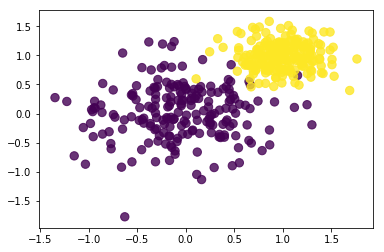

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

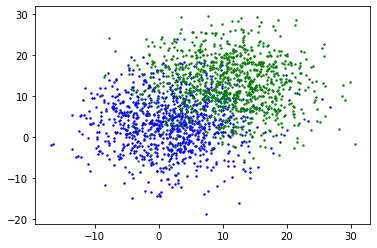

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn

mean = [2, 3]
cov = [[40, 0],[0, 40]]
x1,y1 = np.random.multivariate_normal(mean, cov, 1000).T

mean = [11 , 13]
cov = [[40, 0],[0, 40]]
x2,y2 = np.random.multivariate_normal(mean, cov, 1000).T


plt.scatter(x1, y1 , s=2 , color='blue')
plt.scatter(x2, y2, s=2 , color='green')
plt.show()


2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}

    residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7

     residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0


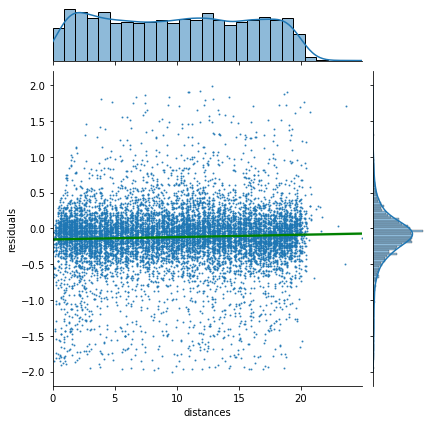

In [126]:
import seaborn as sns

pickle_file = pd.read_pickle('data/residuals_261.pkl')
print(pickle_file)

df = pd.DataFrame(pickle_file.item())
print('\n' , df.head(5))

df = df[df['residuals'].abs() < 2.]
print('\n',df.head(5))

sns.jointplot( data=df , x="distances" , y="residuals",  kind="reg" , line_kws={'color':'green' } , scatter_kws={'s': 1})

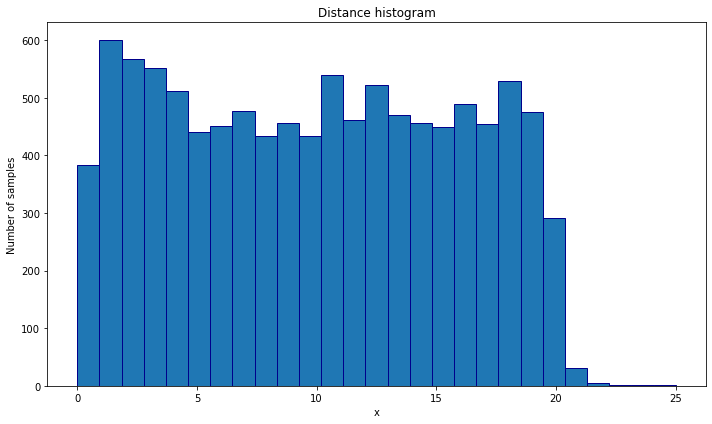

In [153]:
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
_max = round(df['distances'].max())
_min = round(df['distances'].min())
h, bins, _ = plt.hist(df['distances'], bins='auto' , range=(_min,_max), edgecolor='darkblue' )
ax.set_title('Distance histogram')
ax.set_xlabel('x')
ax.set_ylabel('Number of samples')
fig.tight_layout()

bins :
 [ 0.          0.92592593  1.85185185  2.77777778  3.7037037   4.62962963
  5.55555556  6.48148148  7.40740741  8.33333333  9.25925926 10.18518519
 11.11111111 12.03703704 12.96296296 13.88888889 14.81481481 15.74074074
 16.66666667 17.59259259 18.51851852 19.44444444 20.37037037 21.2962963
 22.22222222 23.14814815 24.07407407 25.        ]

bin centers (x):
 [ 0.46296296  1.38888889  2.31481481  3.24074074  4.16666667  5.09259259
  6.01851852  6.94444444  7.87037037  8.7962963   9.72222222 10.64814815
 11.57407407 12.5        13.42592593 14.35185185 15.27777778 16.2037037
 17.12962963 18.05555556 18.98148148 19.90740741 20.83333333 21.75925926
 22.68518519 23.61111111 24.53703704] 


The mean values of the "residuals":
 [-0.24391026 -0.14311085 -0.16328513 -0.16875707 -0.13363151 -0.13243907
 -0.14406174 -0.0811843  -0.07606192 -0.10479104 -0.09490114 -0.04986411
 -0.09333829 -0.07868601 -0.13169437 -0.14191737 -0.13194782 -0.12565761
 -0.18542878 -0.13343577 -0.08718147 -0.0364

<ErrorbarContainer object of 3 artists>

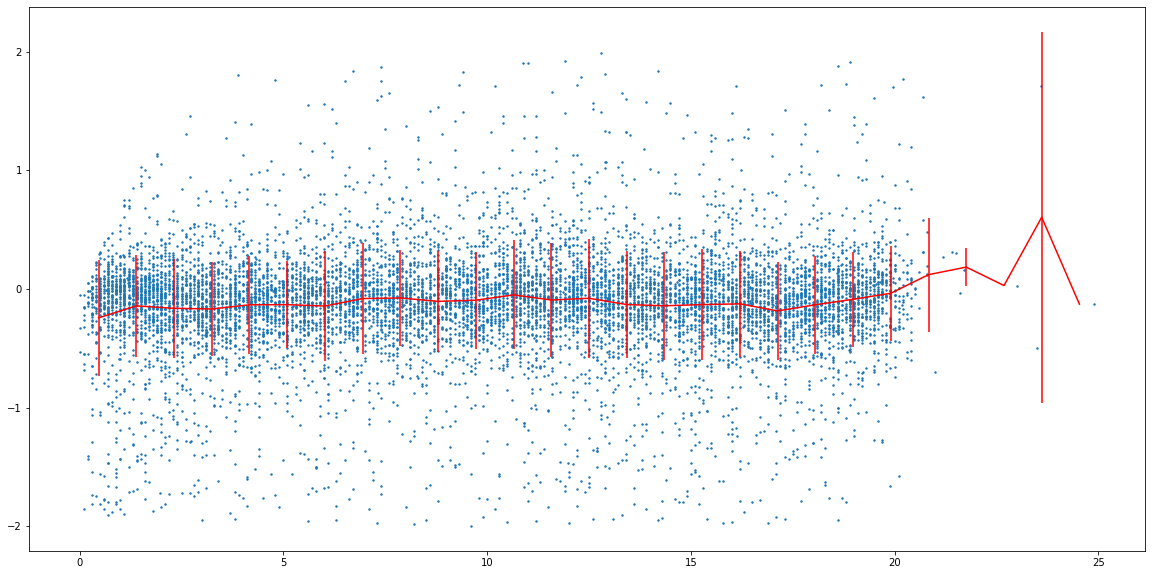

In [220]:
print('bins :\n' ,bins)
x = (bins[:-1] + bins[1:]) / 2
print('\nbin centers (x):\n', x, '\n')


y = (df.groupby(pd.cut(df['distances'], bins)).mean())['residuals'].values
print('\nThe mean values of the "residuals":\n' , y)


err_y = (df.groupby(pd.cut(df['distances'], bins)).std())['residuals'].values
print('\nThe standard deviation of the "residuals":\n' , y)

plt.figure(figsize=(20,10))
plt.scatter(df['distances'], df['residuals'] , s =2)
plt.errorbar(x , y, yerr=err_y , color = 'red')

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


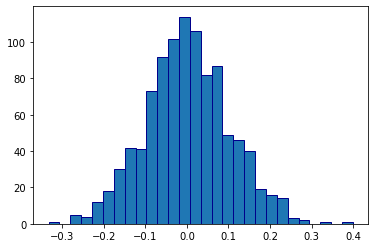

In [242]:
from numpy.random import default_rng

N = 200
mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)
                     
plt.figure()
h, bins, _ = plt.hist(x, bins='auto' , edgecolor='darkblue' )
